In [35]:
import pandas as pd
from pandas.plotting import scatter_matrix

import seaborn as sb
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import scipy.stats as stats # from scipy import stats

# Datasets

In [36]:
brain = pd.read_csv('./Datasets/brain_size.csv', sep=';', na_values='.')
iris = pd.read_csv('./Datasets/Iris.csv', sep=',', na_values='.')
air_passengers = pd.read_csv('./Datasets/AirPassengers.csv', sep=',', na_values='.')
apple = pd.read_csv('./Datasets/AAPL.csv', sep=',', na_values='.')

# Final Study Guide
https://docs.google.com/document/d/11rkB3hd7UaWc4Ku0f3bY7Ran-jBYFOYR9HZZTwsYsAI/edit

Q5: A list for weights of men at Make School is given, how do we calculate the CDF for men's weight?

1. For a given list X and a defined threshold, we could how many elements in X is smaller than the threshold.
2. Change the threshold from step 1 from np.min(X) to np.max(X)

# Day 11 - Time Series Analysis
https://github.com/Make-School-Courses/DS-1.1-Data-Analysis/blob/master/Lessons/TimeSeriesData.md

In [5]:
df = pd.DataFrame({
    'Value': ['100','78','129'] , 
    'Date': ['02/20/2015','01/15/2016','08/21/2015']
})

# Pandas can not process this date format MM/DD/YYYY
df.Date = pd.to_datetime(df.Date) # need to convert to YYYY/MM/DD

# Now we can sort the dates
df.sort_values(by='Date')

,Value,Date
0,100,2015-02-20
2,129,2015-08-21
1,78,2016-01-15


## Exercise with Air Passenger dataset

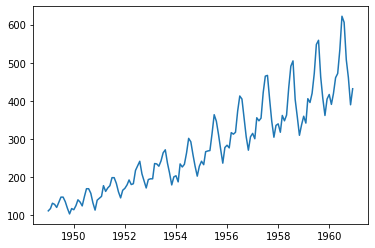

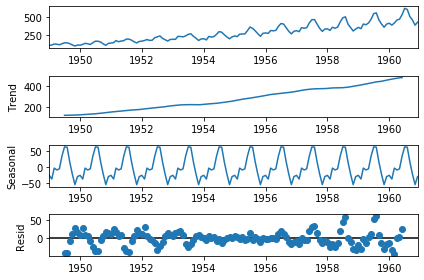

In [11]:
import statsmodels.api as sm

df = air_passengers
df.Month = pd.to_datetime(df.Month)
plt.plot(df.Month, df['#Passengers'])

# Apply decomposition analysis to the time series
df = df.set_index(['Month'])
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
decomposition.plot()

plt.show()

## Sampling and Smoothing
Most of the time, for time series analysis, the data has many ups and downs. But we would like to have a smoother version of the time series.

We can smooth our time series with
1. Sampling the time series
2. Smoothing the time series

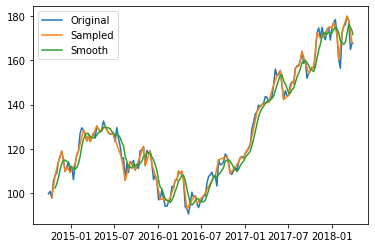

In [19]:
data = apple
data['Date'] = pd.to_datetime(data['Date'])
data['Tick'] = range(0, len(data))
plt.plot(data['Date'], data['Close'], label='Original')

# Sample time series
data_one_tenth = data.sample(frac=0.5)
data_one_tenth = data_one_tenth.sort_values(by=['Tick'])
plt.plot(data_one_tenth['Date'], data_one_tenth['Close'], label='Sampled')

# Smooth the dataset
data['Rolling_Mean']  = data['Close'].rolling(window=5).mean()
plt.plot(data['Date'], data['Rolling_Mean'], label='Smooth')

# plot them all
plt.legend()
plt.show()

## Resource: Quandl
Useful for retrieving financial, economic and sociology data.

import quandl
import numpy as np

`quandl.ApiConfig.api_key = 'YOUR_API_KEY'
aapl_table = quandl.get('WIKI/AAPL') # get Apple stock data
aapl_table.to_pickle('apple_quandl.pkl') # save as a pickle file (?)`

### Exercise: Compute the monthly return for Apple stock data for March 2017

1) take log of 'Close' column  
2) obtain the difference between the consecutive days  
3) add them all * 100  

or

1) use pct_change (combines step 1 and 2 from above)  
2) add them all * 100

In [27]:
aapl_table = pd.read_pickle('./Datasets/apple_quandl.pkl')
aapl_table.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


In [33]:
# how to calculate monthly return 
# https://www.quantconnect.com/tutorials/introduction-to-financial-python/rate-of-return,-mean-and-variance

aapl = aapl_table.loc['2017-3',['Open','Close']]

# From compund rate of return formula
aapl['log_price'] = np.log(aapl['Close'])
x = np.diff(aapl['log_price'])
# print(aapl)
print('method 1', x.sum()*100)

# Another way to compute the montly return
returns = aapl['Close'].pct_change()
print('method 2')
returns.sum()*100
print(np.log(143.66/139.79)*100)

method 1 2.73081001636184
method 2
2.7308100163618443


## Summary
Methods for Time Series Analysis

pd.to_datetime()
df.sample()
df.Column.rolling(window=NUM)
df.Column.pct_change()

# Day 10 - Intro to Statistical Learning
https://github.com/Make-School-Courses/DS-1.1-Data-Analysis/blob/master/Notebooks/StatisticalAnalysis.ipynb
1. Approximate the PDF with any given data with a combination of normal distributions
    - Gaussian Mixture Model (GMM)
    - Kernel Density Estimation (KDE)
2. Correlation among features  


  NOTE: Gaussian = Normal

## Gaussian Mixture Model (GMM)
GMM is a probabilistic model for representing normally distribured subpopulations with an overall population
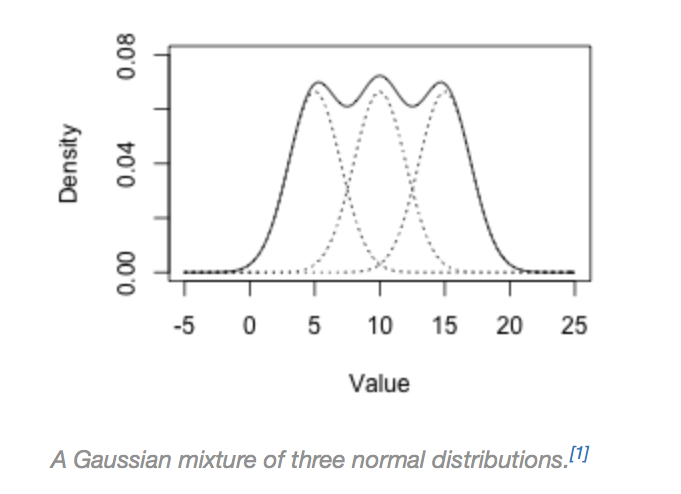

### Exercise: Fit a GMM to a given data sample
1. Generate the concatination of the random variables as follows:  
`
x_1 = np.random.normal(-5, 1, 3000)
x_2 = np.random.normal(2, 3, 7000) 
x = np.concatenate((x_1, x_2)) 
`  

    Questions
    1. What is the mean and variance of x1? x2?
    2. What percentage of data in x is x1? x2? 
  
2. Plot the histogram of x
3. Obtain the weights, mean and variances of each Gassuian

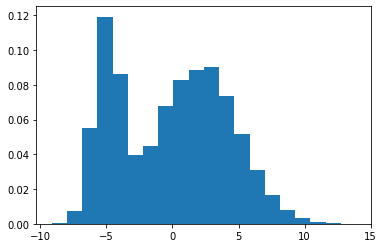

gmm mean: [[ 2.13568553]
 [-4.88961931]]

gmm covariances: [[[8.3624849 ]]

 [[1.14448191]]]

gmm weights: [0.68200685 0.31799315]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture

# Generate data samples and plot its histogram
x_1 = np.random.normal(-5, 1, 3000)
x_2 = np.random.normal(2, 3, 7000) 
x = np.concatenate((x_1, x_2))
plt.hist(x, bins=20, density=1)
plt.show()

# Define a GMM model and obtain its parameters
gmm = mixture.GaussianMixture(n_components=2) # n_components specified by user
gmm.fit(x.reshape(-1,1))
print("gmm mean:", gmm.means_)
print()
print("gmm covariances:", gmm.covariances_)
print()
print("gmm weights:", gmm.weights_)

#### The GMM has learn the probability density function of our data sample¶
You can use GMM-generated samples to fill in missing data

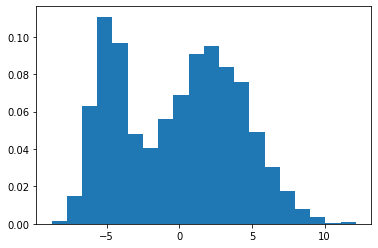

In [4]:
z = gmm.sample(10000)
plt.hist(z[0], bins=20, density=1)
plt.show()

# Q: Are the samples in z and x the same?
# A: No

## Kernel Density Estimation (KDE)
Kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. In other words the aim of KDE is to find probability density function (PDF) for a given dataset.

Approximate the pdf of dataset:

$p(x) = \frac{1}{Nh}\sum_{i = 1}^{N} \ K(\frac{x - x_i}{h})$

where $h$ is a bandwidth and $N$ is the number of data points

### Exercise: Apply KDE on a given data sample

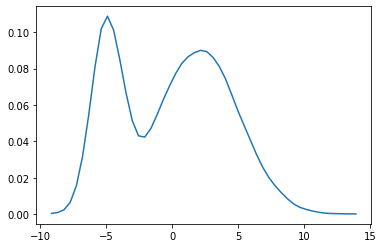

In [5]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=0.6)
kde.fit(x.reshape(-1,1))

s = np.linspace(np.min(x), np.max(x))
log_pdf = kde.score_samples(s.reshape(-1,1))
plt.plot(s, np.exp(log_pdf))

#### To generate samples

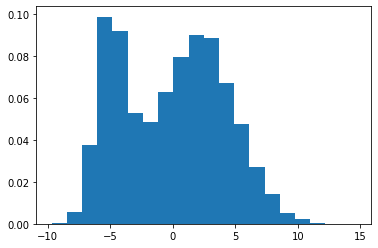

In [6]:
m = kde.sample(10000)
plt.hist(m, bins=20, density=1)
plt.show()

#### Real-world application: KDE can learn handwitten digits distribution and generate new digits¶
http://scikit-learn.org/stable/auto_examples/neighbors/plot_digits_kde_sampling.html

## Correlation
Correlation is used to test relationships between quantitative variables. This can help us make predictions about future behavior.


### Exercise: Obtain the correlation among all features of Iris dataset
1. Review the iris dataset. What are the features?

2. Eliminate two columns ['Id', 'Species']

3. Compute the correlation among all features.  
    Hint: Use `df.corr()`

4. Plot the correlation by heatmap and corr plot in Seaborn -> sns.heatmap, sns.corrplot

5. Write a function that computes the correlation (Pearson formula)  
    Hint: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

6. Compare your answer with scipy.stats.pearsonr for any given two features

In [7]:
df = iris
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df = df.drop(columns = ["Id", "Species"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
def pearson_corr(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    num = [(i - x_mean)*(j - y_mean) for i,j in zip(x,y)]
    den_1 = [(i - x_mean)**2 for i in x]
    den_2 = [(j - y_mean)**2 for j in y]
    correlation_x_y = np.sum(num)/np.sqrt(np.sum(den_1))/np.sqrt(np.sum(den_2))
    return correlation_x_y

print(pearson_corr(df['SepalLengthCm'], df['PetalLengthCm']))
print(stats.pearsonr(df['SepalLengthCm'], df['PetalLengthCm']))

0.8717541573048714
(0.8717541573048713, 1.0384540627941062e-47)


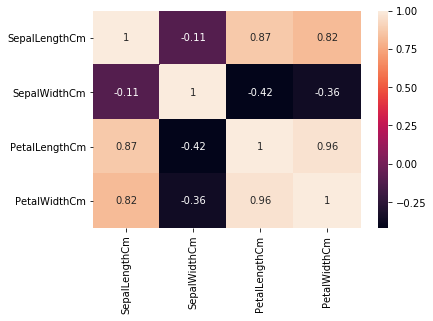

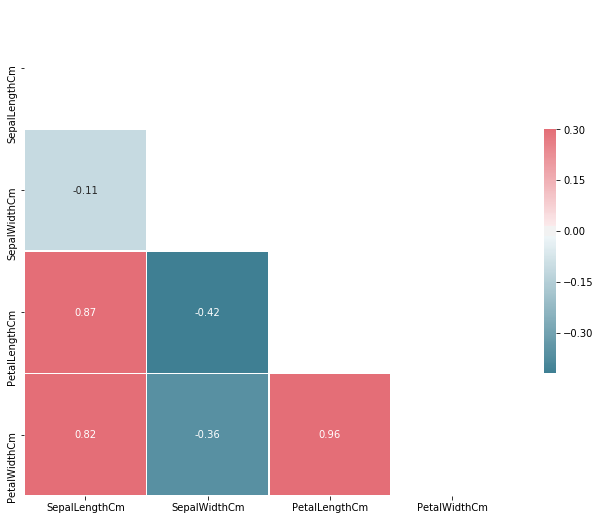

In [11]:
sb.heatmap(df.corr(), annot=True)

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(df.corr(), annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Determine the number of correlations possible = Combination
n = # of features/columns
k = # of features to pass
$(n k) = \frac{n!}{k! (n-1)!}$  

`
from scipy.special import comb
comb(4, 2) # returns 6.0
`

#### Difference between crosstab and correlation?  
crosstab should be used for categorial columns  
correlation should be used for numerical columns
#### What if you want to compare a categorical column with numerical column?
transform the numerical column into categorial and use crosstab

# Day 9 - Confidence Intervals, Outliers, and Statistical Analysis

## Null hypothesis exercise - Brain data
- FSIQ = Full Scale IQ
- VIQ = Verbal IQ
- PIQ = Performance IQ

In [52]:
df = brain
df.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


### 1. Obtain the mean VIQ (Verbal IQ) for the male and female samples.

In [53]:
print('female VIQ mean', df[df.Gender == 'Female'].VIQ.mean())
print('male VIQ mean', df[df.Gender == 'Male'].VIQ.mean())

female VIQ mean 109.45
male VIQ mean 115.25


### 2. Can we accept the population average (mean) of `VIQ` are the same for male and female?   
_Calculate the T-test for the means of two independent samples.  
If the p-value is smaller than the threshold, ex. 1%, 5%, or 10%, then we reject the null hypothesis of equal averages (accept different population average)_

In [54]:
female_VIQ = df[df.Gender == 'Female'].VIQ
male_VIQ = df[df.Gender == 'Male'].VIQ

stat, p = stats.ttest_ind(female, male)
print('stat=%.3f, p=%3f' % (stat, p))

if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=-0.773, p=0.444529
Probably the same distribution


### Extend the above analysis of `FSIQ`, `PIQ`, `Weight`, and `Height` for male and female

In [78]:
iq = df.columns[2:7]
gender = df.Gender.unique()

for category in iq:
    ls = []
    print(category)
    for g in gender:
        ls.append(df[df.Gender == g][category].dropna().values)
        
    stat, p = stats.ttest_ind(ls[0], ls[1])
    print('stat=%.3f, p=%3f' % (stat, p))
    print('mean', np.mean(ls[0]), np.mean(ls[1]))

    if p > 0.05:
        stat, p = stats.ttest_ind(female_Weight, male_Weight)
        print(f'Females and males probably have the same distribution for {category}')
    else:
        print(f'Females and males probably have different distributions for {category}')
    print()

FSIQ
stat=-0.403, p=0.689446
mean 111.9 115.0
Females and males probably have the same distribution for FSIQ

VIQ
stat=-0.773, p=0.444529
mean 109.45 115.25
Females and males probably have the same distribution for VIQ

PIQ
stat=-0.160, p=0.873884
mean 110.45 111.6
Females and males probably have the same distribution for PIQ

Weight
stat=-4.871, p=0.000022
mean 137.2 166.44444444444446
Females and males probably have different distributions for Weight

Height
stat=-6.280, p=0.000000
mean 65.765 71.43157894736842
Females and males probably have different distributions for Height



## Confidence Interval
https://github.com/Make-School-Courses/DS-1.1-Data-Analysis/blob/master/Notebooks/ConfidenceIntervals.ipynb

It is useful to estimate an interval for the possible values of the parameter and put a probability on how confident we are that the true parameter value falls inside this interval.  

__The confidence interval of the mean tests whether our sample contains the population mean. If it falls outside of the population mean, we can determine that that sample is not representative of the population.__

Example  
We have the data X and assume we know the population standard deviation ($\sigma$). What is confidence interval for population mean?

$P(L < \mu < U) = 1 - \alpha$

We want to obtain $L$ and $U$, with 1-$\alpha$ confidence

$L = \bar{x} - z(({1} - \frac{\alpha}{2}) \frac{\sigma} {\sqrt{N}})$

$U = \bar{x} + z(({1} + \frac{\alpha}{2}) \frac{\sigma} {\sqrt{N}})$

z = z-test


### Iris dataset example

In [89]:
df = iris
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [90]:
print('shape', df.shape)

shape (150, 6)


#### 1. Explore this dataset. How many features, records and plants does it have?

In [94]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

#### 2. Find the standard deviation of the sepal length for Iris-setosa.

In [102]:
print('mean', df[df.Species == 'Iris-setosa'].SepalLengthCm.mean())
print('std', df[df.Species == 'Iris-setosa'].SepalLengthCm.std())

mean 5.006
std 0.35248968721345136


#### 3. Write a function that calculate lower and upper bound for mean of sepal length for Iris-setosa with 95% confidence. (Compute the confidence level for the mean). Assume sigma = 0.3525 and significance_level = 0.05. 

In [107]:
# What we know: 
N = 50
mean = 5.01
sigma = 0.3525
significance_level = 0.05
confidence_level = 1 - significance_level

def confidence_interval_z(data_sample, significance_level, sigma):
    z = stats.norm.ppf(1 - significance_level / 2) # z-test
    L = np.mean(data_sample) - z*sigma/np.sqrt(len(data_sample))
    U = np.mean(data_sample) + z*sigma/np.sqrt(len(data_sample))
    return L, U

def confidence_interval_t(data_sample, significance_level):
    t = stats.t.ppf(1 - significance_level / 2, len(data_sample) - 1) # t-test
    L = np.mean(data_sample) - t*sigma/np.sqrt(len(data_sample))
    U = np.mean(data_sample) + t*sigma/np.sqrt(len(data_sample))
    return L, U

print(confidence_interval_z(df[df.Species == 'Iris-setosa'].SepalLengthCm, significance_level, sigma))
print(confidence_interval_t(df[df.Species == 'Iris-setosa'].SepalLengthCm, significance_level))

(4.908293780383348, 5.103706219616653)
(4.905820608569364, 5.106179391430636)


## Outliers
https://github.com/Make-School-Courses/DS-1.1-Data-Analysis/blob/master/Notebooks/Outlier_Correlation_StatisticalAnalysis.ipynb  
  
Assume given list `x` has normal distribution. A trivial way to check for the normal distribution is to plot the histogram (PDF) of `x`. Any element in x[i] > mean(x) + 3std(x) or x[i] <= mean(x) - 3std(x) are considered outliers and should be removed.

### Activity: Find and remove outliers if our dataset is Normal.

-698.5753571328537 844.2896428471395
([1, 2, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1, 3, 1000], [1000])


(array([13.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   1. ,  100.9,  200.8,  300.7,  400.6,  500.5,  600.4,  700.3,
         800.2,  900.1, 1000. ]),
 <a list of 10 Patch objects>)

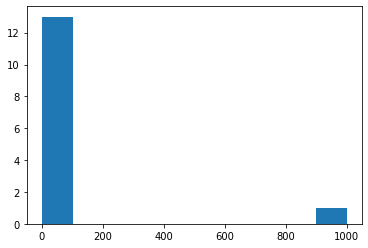

In [139]:
def outliers(data):
    outliers = []
    mean = np.mean(data)
    std = np.std(data)
    lower = mean - 3*std
    upper = mean + 3*std
    print(lower, upper)
    for d in data:
        if d < lower or d > upper:
            outliers.append(d)
    return data, outliers

x = [1, 2, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1, 3, 1000]
print(outliers(x))
plt.hist(x)

# FIX AND REVIEW Day 8 - Hypothesis Testing and Acceptable Error

## Null hypothesis

#### Ex. Drug testing on rats

A neurologist is testing the effect of a drug on response time by injecting 100 rats with a unit dose of a drug, subjecting each to neurologist stimulus and recording its response time. The neurologist knows that the mean response time for rats not injected with the drug is 1.2 seconds. The mean of the 100 injected rats's response time is 1.05 seconds with population standard deviation of 0.5 seconds. Do you think the drug has effect on response time?


Scenario A: rats without drug injections
- this is the population information, we have many examples   
$\mu = 1.2$ is the population mean  
$\sigma$ = 0.5(s) -- we may know about population std for A  

Scenario B: rats with drug injections (100) 
- we have samples, take the mean to get average response rate / sample mean  
$\mu_x = 1.5$ is the sample mean  
S = sample std  

Goal of null hypothesis:  
We want to have a conclusion about population mean for scenario B  

Taking from what we know in Scenario A, we can __assume__ that the mean response time for a rat injected with the drug is 1.2 seconds, which means the drug has no effect on response time.


$H_o :$ Drug has no effect &rarr; $\mu_x = 1.2$ even with drug

$H_a :$ Drug has effect &rarr; $\mu_x \neq 1.2$ when the drug is given  


- Sample distribution: distribution of the means from each sample group
- Define confidence level $\alpha$ - 95%
    - this means that our sample should be within 95% of the sample distribution, according to the null hypothesis   
- (1 - $\alpha$) is the significance level = 0.05
    - this means that if our sample is not within the sample distribution, aka less than 5%, we reject the null hypothesis
- the mean of the sample distribution = the population mean

### The steps to reject or accept the null hypothesis
1. The population mean is known, $\mu$
2. The sample mean is known, $\bar{x}$
3. Define a significant level, $\alpha$
4. If $N$ > 30 or $\sigma$ is known, then calculate the z-score $ = \frac{\bar{x} - \mu}{\sigma/\sqrt{N}} $
5. Calculate p-value, $p_{value} = 2 * sf(z_{score})$
6. Decision: if $p_{value}$ < $\alpha$ then reject the null hypothesis

In [41]:
'''
mu = mu for scenario A (population mean)
sigma = std for scenario A (population std)
(alpha) significance_level = 
(X_bar) sample_mean = for scenario B
(S) sample_std = for scenario B
'''

# FIX THIS MESS

def z_test(mu, sigma, significant_level, sample_lst=None, sample_size=None, sample_mean=None):
    if sample_lst is None:
        if sample_mean is not None:
            z_score = (sample_mean - mu) / ((sigma) / np.sqrt(sample_size))
        else:
            print("Insufficient data to calculate z-score")
    else:
        sample_mean = np.array(sample_lst).mean()
        z_score = (sample_mean - mu) / ((sigma) / np.sqrt(len(sample_lst)))
    
    # p_value = 2 * norm.cdf(-np.abs(z_score)) or 
    p_value = 2 * stats.norm.sf(np.abs(z_score)) # norm.sf is survival function or 1 - cdf
    
    # Determine whether to accept or reject null hypothesis
    if p_value < significant_level:
        print('reject null hypothesis')
    else:
        print('accept null hypothesis')

z_test(1.2, 0.05, 0.05, sample_mean=1.05, sample_size=100)

reject null hypothesis


## T-test
- use this test when you don't know sigma

The average British man is 175.3 cm tall. A survey recorded the heights of 10 British men who drank a special type of Milk for 2 years.

Calculate the t-score from the previous formula and use the available function in `stats.ttest_1samp`. Compare what you will get with x as your input:

x = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]

We want to know whether the mean of the sample is different from the population mean

In [18]:
def t_test(mu, sig_level, sample_lst):
    
    sample_mean = np.array(sample_lst).mean()
    sample_std = np.array(x).std(ddof=1)

    t_score = (sample_mean - mu) / ((sample_std) / np.sqrt(len(sample_lst)))
    print('t_score:', t_score)
    
    p_value = 2 * stats.norm.sf(np.abs(t_score))
    
    # Determine whether to accept or reject null hypothesis
    if p_value < sig_level:
        print('reject null hypothesis')
    else:
        print('accept null hypothesis')

x = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]
t_test(175.3, 0.05, x)
        
# one sample t-test that gives you the p-value too can be done with scipy as follows:
t, p = stats.ttest_1samp(x, 175.3)
print("t =", t, ", p =", p)

t_score: 2.295568968083183
reject null hypothesis
t = 2.295568968083183 , p = 0.04734137339747034


In [ ]:
# FIX THIS MESS

def z_or_t_test(mu, significant_level, sample_lst, sigma=None):
    if sigma is None or sample_size < 30:
        return t_test(mu, significant_level, sample_lst)
    else:
        return z_test()

#### check this out  
https://iaingallagher.tumblr.com/post/50980987285/t-tests-in-python

# FIX AND REVIEW Day 7 - Statistical Data Analysis
- Histogram
- PDF
- CDF
- Normal distribution
- Z distribution: normal distribution when it's mean is 0 and std is 1

In [281]:
titanic = pd.read_csv("./Datasets/titanic.csv")

# Day 6 - Applied Probability
Class notebook: https://github.com/Make-School-Courses/DS-1.1-Data-Analysis/blob/master/Notebooks/Applied_Probability.ipynb

In [326]:
df = titanic

What is the probability (chance) that a passenger in Titanic is female?

In [295]:
len(df[df.Sex == 'female'].Sex.dropna()) / len(df.Sex.dropna())

0.35241301907968575

Example 1: I Scream for Ice Cream

70% of your friends like Chocolate and 35% like Chocolate AND Strawberry.
What percent of those who like Chocolate also like Strawberry?

Event A: Chocolate  
Event B: Strawberry

P(Chocolate) = 0.7  
P(Chocolate and Strawberry) = 0.35  

P(Strawberry | Chocolate) = ? 

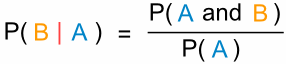

In [297]:
(0.35) / (0.7)

0.5

Given that some passengets paid over $100 for their ticket, what is the chance they survived?
- solution 1: P(survived = 1 | fare > 100) directly
- solution 2: bayesian --> P(survived = 1 | fare > 100)) / P(fare > 100)

In [312]:
# 1
print(len(df[(df.Survived == 1) & (df.Fare > 100)]) / len(df[df.Fare > 100]))

# 2
print(df[df['Fare'] > 100]['Survived'].value_counts()[1] / len(df[df.Fare > 100]))


0.7358490566037735
0.7358490566037735


What is the probability that a survived passenger was a man?

In [320]:
len(df[(df.Survived == 1) & (df.Sex == "male")]) / len(df[df.Survived == 1])

0.31871345029239767

Given that a passenger is under 30 but over 20 years older, what are the chances they are in the first class?

In [335]:
len(df[(df.Age < 30) & (df.Age > 20) & (df.Pclass == 1)]) / len(df[(df.Age < 30) & (df.Age > 20)])

0.16585365853658537

- Given that a female passenger was unmarried, what are the chances that she survived?
- Given that a male passenger over 30 years did not survive, what are the odds that he paid less than $25 for a ticket?


## Tennis Dataset

In [343]:
df = pd.read_csv('Datasets/tennis.txt', header=None, delimiter='\t', names=['Outlook', 'Temp', 'Humidity', 'Wind', 'Decision'])
df.head()

,Outlook,Temp,Humidity,Wind,Decision
1,Sunny,Hot,High,Weak,No
2,Sunny,Hot,High,Strong,No
3,Overcast,Hot,High,Weak,Yes
4,Rain,Mild,High,Weak,Yes
5,Rain,Cool,Normal,Weak,Yes


What is the probability that a tennis player plays when wind is weak?

In [349]:
numerator = df[(df.Wind == "Weak") & (df.Decision == "Yes")]
denominator = df[df.Wind == "Weak"]

len(numerator) / len(denominator)

0.75

#### Write a function that takes  
- one of these columns (temp, humidity, wind)
- the column's unique values
- the tennis player's decision
- returns the probability of Yes or No

In [388]:
def conditional_probability(col, col_unique, decision_col):
    condition_df = df[(df[col] == col_unique) & decision_col]
    return dict(condition_df['Decision'].value_counts() / len(condition_df['Decision']))

conditional_probability('Wind', 'Weak', df['Decision'])    

{'Yes': 0.75, 'No': 0.25}

## Startup Dataset

In [37]:
df = pd.read_csv("Datasets/Startup.csv")
df.head()

,name,category_list,funding_total_usd,status,country_code,state_code,city,funding_rounds,Investors,Number_of_Investors,Acquirer,Acquirer_Category,Acquirer_Country,Acquirer_State,Acquirer_City,Acquired_Price,Acquired Currency,county,founded_at,Coordinates
0,H2O.ai,Software,33.600000,operating,USA,CA,Mountain View,4.0,Capital One:20000000|Nexus Venture Partners:33...,11.0,-,-,-,-,-,-,-,Santa Clara,2011,37.399364:-122.079517
1,One Inc.,Mobile,1.150050,operating,USA,CA,San Francisco,3.0,Camp One Ventures:150000|CRV:1000050|General C...,12.0,-,-,-,-,-,-,-,San Francisco,2011,37.727239:-123.032229
2,1000 Corks,Software,0.040000,operating,USA,OR,Lake Oswego,1.0,Start-Up Chile:40000,1.0,-,-,-,-,-,-,-,Clackamas,2008,45.412305:-122.699154
3,1000museums.com,Software,6.795451,operating,USA,MA,Lenox,9.0,Alliance of Angels:1289879.0|Converge Venture ...,7.0,-,-,-,-,-,-,-,Berkshire,2008,42.361228:-73.286788
4,Redox,Health,4.000000,operating,USA,WI,Madison,2.0,.406 Ventures:3530000|DreamIt Ventures:470000|...,6.0,-,-,-,-,-,-,-,Dane,2014,43.087806:-89.430121


Compare `founded_at` with `funding_total_usd`

#### Find the total funding in 2011

In [38]:
# for total funding in 2011
df_dropped = df.dropna()
found_2011 = df_dropped[df_dropped['founded_at'] == '2011']['funding_total_usd']
sum(found_2011)

24591.242369436015

#### Find the total funding for all years

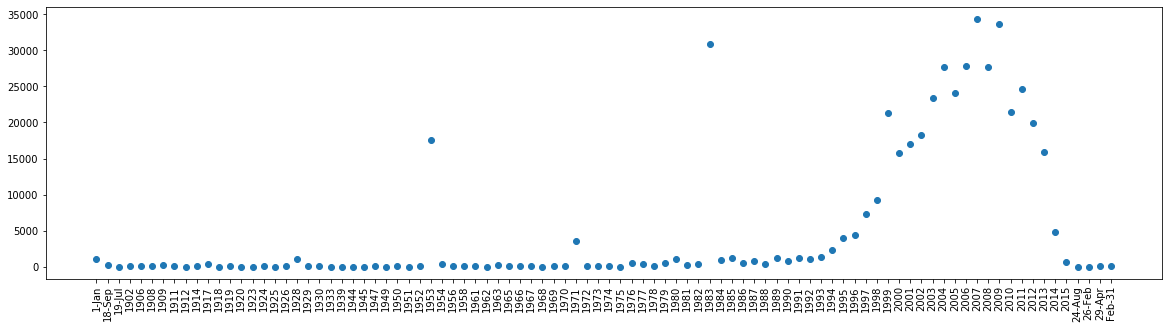

In [433]:
# we want to go through each year and get the total sum of funding in that year

ls = []
for i in list(df_dropped['founded_at'].sort_values().unique()):
    ls.append(df_dropped[df_dropped['founded_at'] == i]['funding_total_usd'].sum())
    
plt.figure(figsize=(20, 5), frameon=False)
plt.xticks(rotation=90)
plt.plot(list(df_dropped['founded_at'].sort_values().unique()), ls, 'o')

# funding = {}
# for row in df_dropped.all():
#     print(row)
# #     if funding[row['founded_at']] is None:
# #         funding[row['founded_at']] = 0
# #     funding[row['founded_at']] += row['funding_total_usd']

# df_dropped['founded_at'].sort_values().unique()

#### Find the total funding for each year in Software

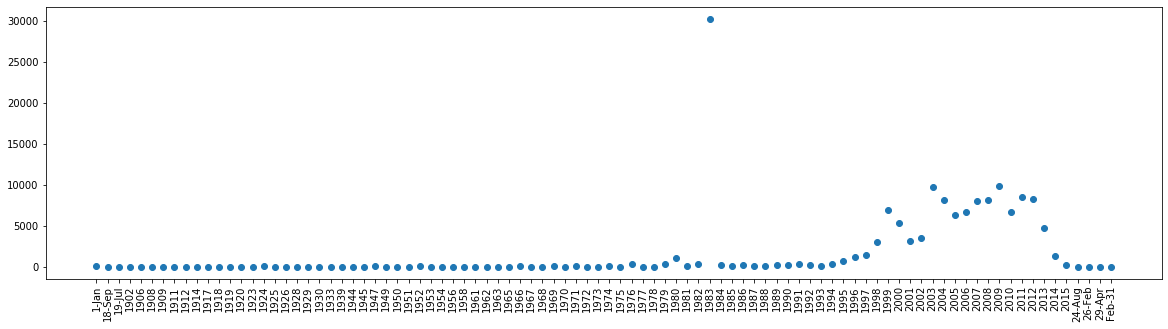

In [436]:
ls = []
for i in list(df_dropped['founded_at'].sort_values().unique()):
    ls.append(df_dropped[(df_dropped['founded_at'] == i) & (df_dropped['category_list'] == 'Software')]['funding_total_usd'].sum())
    
plt.figure(figsize=(20, 5), frameon=False)
plt.xticks(rotation=90)
plt.plot(list(df_dropped['founded_at'].sort_values().unique()), ls, 'o')

# Day 5 - Applied Descriptive Statistics

In [232]:
df = titantic
pd.crosstab(df.Sex, df.Embarked)

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


#### _Exercise_
#### What percentage of passengers in Titanic embarked at C?

In [228]:
# 1
len(df[df.Embarked == 'C']) / len(df) 

# 2
len(df[df.Embarked == 'C']) / df.Embarked.notna().sum()

0.1889763779527559

#### What percentage of female passengers in Titanic embarked at C?

In [217]:
len(df[(df.Embarked == 'C') & (df.Sex == 'female')]) / len(df[df.Sex == 'female'])

0.23248407643312102

## Central Tendancy
- Mean
- Median
- Mode

### Mean

#### What is the average age of male passengers that survived?

_With built-in mean function_

In [237]:
df[(df.Sex == 'male') & (df.Survived == 1)].Age.mean()

27.276021505376345

_With self-defined mean function_

In [246]:
def compute_mean(dataset):
    return sum(dataset) / len(dataset)

compute_mean(df[(df.Sex == 'male') & (df.Survived == 1)].Age.dropna())

27.276021505376345

_With Panda's agg function and self-defined mean function_

In [247]:
df[(df.Sex == 'male') & (df.Survived == 1)].Age.dropna().agg(compute_mean)

27.276021505376345

### Median

#### Write a function to compute the median from an arbitrary dataset

In [265]:
import math

def compute_median(dataset):
    count = len(dataset)
    data_sort = dataset.sort_values()
    
    if count < 1:
        return None
    if count % 2 == 1:
        return data_sort[(count - 1) // 2]
    else:
        return (data_sort[math.floor((count - 1) / 2)] + data_sort[math.ceil((count - 1) / 2)]) / 2

compute_median(df.Age.dropna()) # RETURNS WRONG VALUE
compute_median(df)

TypeError: sort_values() missing 1 required positional argument: 'by'

In [267]:
df.Age.dropna().median()

28.0

### Mode

#### Write a function to compute the mode from an arbitrary dataset

In [273]:
def compute_mode(dataset): 
    histogram = {}
    for point in dataset:
        if point not in histogram:
            histogram[point] = 0
        else:
            histogram[point] += 1
            
    return histogram

compute_mode(df.Age.dropna())

{22.0: 26,
 38.0: 10,
 26.0: 17,
 35.0: 17,
 54.0: 7,
 2.0: 9,
 27.0: 17,
 14.0: 5,
 4.0: 9,
 58.0: 4,
 20.0: 14,
 39.0: 13,
 55.0: 1,
 31.0: 16,
 34.0: 14,
 15.0: 4,
 28.0: 24,
 8.0: 3,
 19.0: 24,
 40.0: 12,
 66.0: 0,
 42.0: 12,
 21.0: 23,
 18.0: 25,
 3.0: 5,
 7.0: 2,
 49.0: 5,
 29.0: 19,
 65.0: 2,
 28.5: 1,
 5.0: 3,
 11.0: 3,
 45.0: 11,
 17.0: 12,
 32.0: 17,
 16.0: 16,
 25.0: 22,
 0.83: 1,
 30.0: 24,
 33.0: 14,
 23.0: 14,
 24.0: 29,
 46.0: 2,
 59.0: 1,
 71.0: 1,
 37.0: 5,
 47.0: 8,
 14.5: 0,
 70.5: 0,
 32.5: 1,
 12.0: 0,
 9.0: 7,
 36.5: 0,
 51.0: 6,
 55.5: 0,
 40.5: 1,
 44.0: 8,
 1.0: 6,
 61.0: 2,
 56.0: 3,
 50.0: 9,
 36.0: 21,
 45.5: 1,
 20.5: 0,
 62.0: 3,
 41.0: 5,
 52.0: 5,
 63.0: 1,
 23.5: 0,
 0.92: 0,
 43.0: 4,
 60.0: 3,
 10.0: 1,
 64.0: 1,
 13.0: 1,
 48.0: 8,
 0.75: 1,
 53.0: 0,
 57.0: 1,
 80.0: 0,
 70.0: 1,
 24.5: 0,
 6.0: 2,
 0.67: 0,
 30.5: 1,
 0.42: 0,
 34.5: 0,
 74.0: 0}

In [274]:
# For any given dataset(list), most of the list value would be (mean - std) and (mean + std)

In [275]:
# Range
# Variance
# Standard Deviation
# Percentile

In [276]:
# REVIEW NOTES

# https://github.com/Make-School-Courses/DS-1.1-Data-Analysis/blob/master/Notebooks/Applied_Descriptive_Statistics.ipynb

# https://github.com/Make-School-Courses/DS-1.1-Data-Analysis/blob/master/Lessons/AppliedDescriptiveStatistics.md

# Day 4 - Combining Dataframes
Class Notebook   
https://github.com/Make-School-Courses/DS-1.1-Data-Analysis/blob/master/Notebooks/Pandas_Merge_Concatenate.ipynb

#### Quick recap exercise: 

1. For female passengers, what percentage survived and what percentage died?

In [186]:
female = df[df.Sex == 'female']
female_survived = len(female[female.Survived == 1]) / len(female)
female_died = len(female[female.Survived == 0]) / len(female)
print(female_survived)
print(female_died)

0.7420382165605095
0.25796178343949044


#### pd.crosstab()

In [187]:
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


#### pd.crosstab in percentage

In [188]:
pd.crosstab(df['Sex'], df['Survived'], normalize='index')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


#### by groupby()

In [189]:
df.groupby('Sex')['Survived'].value_counts(normalize='index')

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

2. For survived passengers, what percentage were male and what percentage were female?

In [190]:
survived = df[df.Survived == 1]
female_survived = len(survived[survived.Sex == 'female']) / len(survived)
male_survived = len(survived[survived.Sex == 'male']) / len(survived)
print(female_survived)
print(male_survived)

0.6812865497076024
0.31871345029239767


In [191]:
pd.crosstab(df['Survived'], df['Sex'], normalize='index')

Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.681287,0.318713


#### Stack plot of count based on Sex for different Passenger class

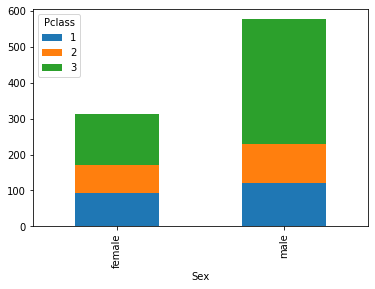

In [192]:
df.groupby(['Sex'])['Pclass'].value_counts().unstack().plot(kind='bar', stacked=True)

#### Stack plot of count based on Sex and Survival for different Passenger class

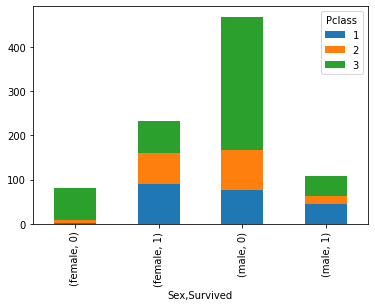

In [193]:
df.groupby(['Sex', 'Survived'])['Pclass'].value_counts().unstack().plot(kind='bar', stacked=True)

#### How to represent the above crosstab in percentage and graphically present

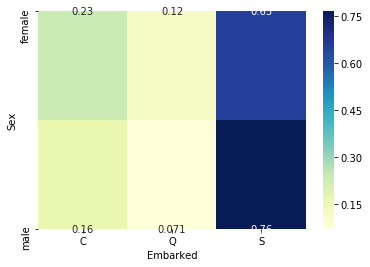

In [194]:
sns.heatmap(pd.crosstab(df['Sex'], df['Embarked'], normalize='index'), cmap='YlGnBu', annot=True)

## `pd.merge()`

In [195]:
import pandas as pd

adf = pd.DataFrame(data={'x1': ['A', 'B', 'C'], 'x2': [1, 2, 3]})
adf

,x1,x2
0,A,1
1,B,2
2,C,3


In [196]:
bdf = pd.DataFrame(data={'x1': ['A', 'B', 'D'], 'x3': ['T', 'F', 'T']})
bdf

,x1,x3
0,A,T
1,B,F
2,D,T


### `left`
merge bdf into adf

In [197]:
pd.merge(adf, bdf, how='left')

,x1,x2,x3
0,A,1,T
1,B,2,F
2,C,3,NaN


### `right`
merge bdf into adf

In [198]:
pd.merge(adf, bdf, how='right')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,D,NaN,T


### `Inner`
merge based on commonalities

In [199]:
pd.merge(adf, bdf, how='inner')

,x1,x2,x3
0,A,1,T
1,B,2,F


In [200]:
pd.merge(adf, bdf) # default value for 'how' is 'inner'

,x1,x2,x3
0,A,1,T
1,B,2,F


### `outer` 
union of merge for adf and bdf

In [201]:
pd.merge(adf, bdf, how='outer')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


## Reshaping Dataframes
modifies original dataframe

### `concat()`
appending to a Pandas dataframe

In [202]:
# append bdf after adf (row-wise)
pd.concat([adf, bdf], sort=True)

,x1,x2,x3
0,A,1.0,NaN
1,B,2.0,NaN
2,C,3.0,NaN
0,A,NaN,T
1,B,NaN,F
2,D,NaN,T


In [203]:
# column-wise concatenation
pd.concat([adf, bdf], axis=1)

,x1,x2,x1,x3
0,A,1,A,T
1,B,2,B,F
2,C,3,D,T


In [204]:
cdf = pd.DataFrame(data={'x1': ['A', 'B', 'C'], 'x3': ['T', 'F', 'T']})
pd.concat([adf, cdf], axis=1)

,x1,x2,x1,x3
0,A,1,A,T
1,B,2,B,F
2,C,3,C,T


### `append()`
When two dataframes have exactly the same columns

In [205]:
df1 = pd.DataFrame([[1, 2], [3, 4]], columns=['a', 'b'])
df2 = pd.DataFrame([[5, 6], [7, 8]], columns=['a', 'b'])

df = df1.append(df2, ignore_index=True)
df

,a,b
0,1,2
1,3,4
2,5,6
3,7,8


### `melt()`

In [206]:
# Initialize the data and dataframe
data = {'weekday': ["Monday", "Tuesday", "Wednesday", 
         "Thursday", "Friday", "Saturday", "Sunday"],
        'Person 1': [12, 6, 5, 8, 11, 6, 4],
        'Person 2': [10, 6, 11, 5, 8, 9, 12],
        'Person 3': [8, 5, 7, 3, 7, 11, 15]}

df = pd.DataFrame(data, columns=['weekday', 'Person 1', 'Person 2', 'Person 3'])
df

,weekday,Person 1,Person 2,Person 3
0,Monday,12,10,8
1,Tuesday,6,6,5
2,Wednesday,5,11,7
3,Thursday,8,5,3
4,Friday,11,8,7
5,Saturday,6,9,11
6,Sunday,4,12,15


In [207]:
melted = pd.melt(df, id_vars=["weekday"], var_name="Person", value_name="Score")
melted

,weekday,Person,Score
0,Monday,Person 1,12
1,Tuesday,Person 1,6
2,Wednesday,Person 1,5
3,Thursday,Person 1,8
4,Friday,Person 1,11
5,Saturday,Person 1,6
6,Sunday,Person 1,4
7,Monday,Person 2,10
8,Tuesday,Person 2,6
9,Wednesday,Person 2,11


### Slicing dataframe based on largest value for a specific column

In [208]:
import numpy as np

df = pd.DataFrame(
    {'a': [1, 10, 8, 11, -1],
     'b': list('abdce'), 
     'c': [1.0, 2.0, np.nan, 3.0, 4.0]}
)
df

,a,b,c
0,1,a,1.0
1,10,b,2.0
2,8,d,NaN
3,11,c,3.0
4,-1,e,4.0


In [209]:
# Select the three largest values from column 'a'. 
# Keep only the values in columns 'b' and 'c' that are in the same row as the 3 largest values in 'a'
df.nlargest(3, 'a')

,a,b,c
3,11,c,3.0
1,10,b,2.0
2,8,d,NaN


## Summary  

methods that combine dataframes
1. left join
2. right join
3. inner join
4. outer join
5. appending
6. concat

methods that reshape original dataframes
1. melt
2. append
3. pivot

pandas cheat sheet
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

## Quiz

In [212]:
df = pd.read_csv('Datasets/titanic.csv')

# Average age for female embarked section C -- 28.34
# Average age for male embarked section C -- 32.99
# print(df[df.Embarked == 'C'].groupby('Sex')['Age'].mean())

# Average age for passengers for embarked section C is 30.81. Why?
# print('average age', df[df.Embarked == 'C']['Age'].mean())

# Hint: determine how many not NaN values there are for the age of each gender in section C
female_not_nan = len(df[(df.Embarked == 'C') & (df.Sex == 'female')].Age.dropna())
male_not_nan = len(df[(df.Embarked == 'C') & (df.Sex == 'male')].Age.dropna())

female_mean = df[df.Embarked == 'C'].groupby('Sex')['Age'].mean()['female']
male_mean = df[df.Embarked == 'C'].groupby('Sex')['Age'].mean()['male']

mean = ((female_mean * female_not_nan) + (male_mean * male_not_nan)) / (female_not_nan + male_not_nan)
print(mean)

30.81476923076923


Note: Check out Power BI

# Day 3 - Data Manipulation and Visualization

In [148]:
import numpy as np
import pandas as pd

df = pd.read_csv('Datasets/titanic.csv')

## `df.head()`
Return first 5 rows of dataframe

In [149]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## `df.tail()`
Return last 5 rows of dataframe

In [150]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## `df.shape`
Returns number of rows and columns in dataframe

In [151]:
df.shape

(891, 12)

## Matplotlib

#### Plot the passengers by age

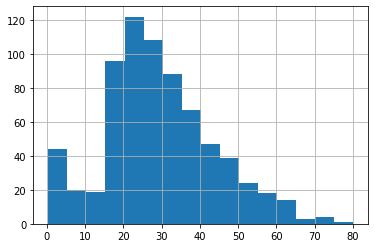

In [152]:
import matplotlib.pyplot as plt

df['Age'].hist(bins=16)
plt.show()

## `isna()`
Check for empty or null values

#### How many rows have empty or null values for Age?

In [153]:
df['Age'].isna().sum()

177

#### Create a new column called "Gender"
Return 1 if the Sex is 'female' and 0 if the Sex is 'male'

In [154]:
df['Gender'] = df['Sex'].map({'female': 0, 'male': 1}).astype(int)
df[['Sex', 'Gender']]

,Sex,Gender
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1
...,...,...
886,male,1
887,female,0
888,female,0
889,male,1


Confirm a column has been added

In [155]:
df.shape

(891, 13)

#### Show the majority of Age range

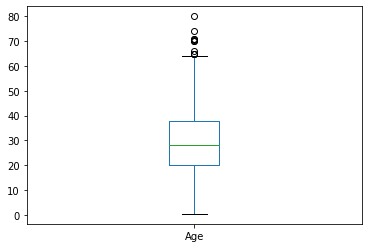

In [156]:
df['Age'].plot.box() # IQR interval

## `dropna()`
Remove all values that are empty or null

#### List all of the ages that are not null

In [157]:
df['Age'].dropna().values

array([22.  , 38.  , 26.  , 35.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 31.  , 35.  ,
       34.  , 15.  , 28.  ,  8.  , 38.  , 19.  , 40.  , 66.  , 28.  ,
       42.  , 21.  , 18.  , 14.  , 40.  , 27.  ,  3.  , 19.  , 18.  ,
        7.  , 21.  , 49.  , 29.  , 65.  , 21.  , 28.5 ,  5.  , 11.  ,
       22.  , 38.  , 45.  ,  4.  , 29.  , 19.  , 17.  , 26.  , 32.  ,
       16.  , 21.  , 26.  , 32.  , 25.  ,  0.83, 30.  , 22.  , 29.  ,
       28.  , 17.  , 33.  , 16.  , 23.  , 24.  , 29.  , 20.  , 46.  ,
       26.  , 59.  , 71.  , 23.  , 34.  , 34.  , 28.  , 21.  , 33.  ,
       37.  , 28.  , 21.  , 38.  , 47.  , 14.5 , 22.  , 20.  , 17.  ,
       21.  , 70.5 , 29.  , 24.  ,  2.  , 21.  , 32.5 , 32.5 , 54.  ,
       12.  , 24.  , 45.  , 33.  , 20.  , 47.  , 29.  , 25.  , 23.  ,
       19.  , 37.  , 16.  , 24.  , 22.  , 24.  , 19.  , 18.  , 19.  ,
       27.  ,  9.  , 36.5 , 42.  , 51.  , 22.  , 55.5 , 40.5 , 51.  ,
       16.  , 30.  ,

#### Slice the dataframe for those whose Embarked section was 'C'

In [158]:
df[df['Embarked'] == 'C'].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,1


#### How many people were marked as 'C' for Embarked?

In [159]:
len(df[df['Embarked'] == 'C'])

168

#### Plot the Age range for people who were marked 'C' for Embarked

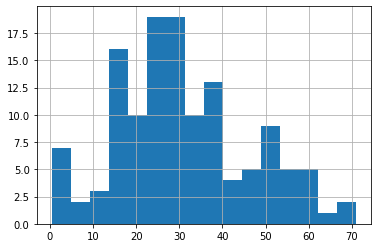

In [160]:
# df[df['Embarked'] == 'C']['Age'].hist(bins=16)
df[df['Embarked'] == 'C'].Age.hist(bins=16)
plt.show()

#### Apply couple of Normal Distributions to the histogram obtained above

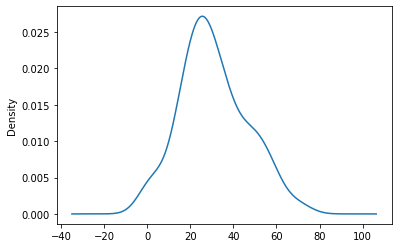

In [161]:
df[df['Embarked'] == 'C']['Age'].plot(kind='kde') # plot PDF, kde = kernel density estimation

#### Describe a specific column

In [162]:
df['Embarked'].describe() # this tells us that 644 out of 899 people were marked 'S' for Embarked

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

#### How many unique values does Embarked have?

In [163]:
df['Embarked'].nunique()

3

#### Count the different Embarked values the dataframe has

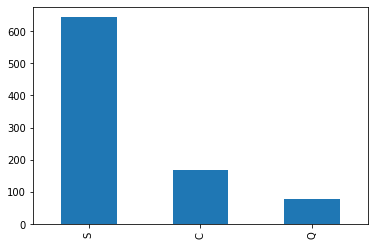

In [164]:
df['Embarked'].value_counts().plot(kind='bar')

In [165]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### Count the different Embarked values the dataframe has and plot horizontally

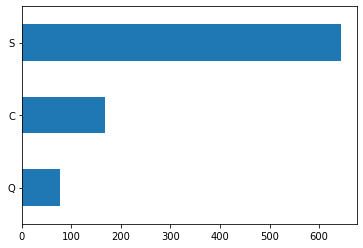

In [166]:
df['Embarked'].value_counts().plot(kind='barh').invert_yaxis()

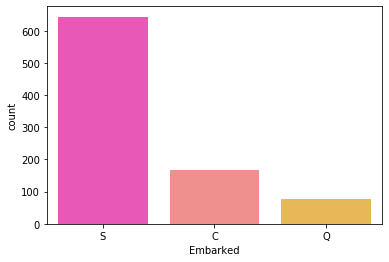

In [167]:
import seaborn as sns

sns.countplot(x="Embarked", palette="spring", data=df)

In [168]:
dict(df['Embarked'].value_counts())

{'S': 644, 'C': 168, 'Q': 77}

In [169]:
df['Sex'].value_counts().to_json()

'{"male":577,"female":314}'

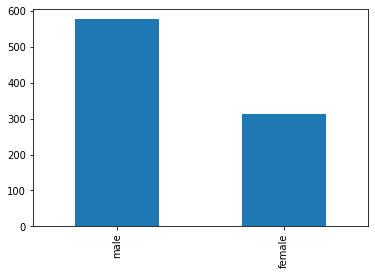

In [170]:
df['Sex'].value_counts().plot(kind='bar')

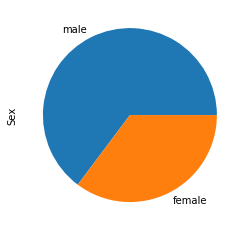

In [171]:
df['Sex'].value_counts().plot(kind='pie')

#### Plot how many of the passengers were children, youth, middle age, and old based on their Sex for those who 'Embarked' in section 'C'

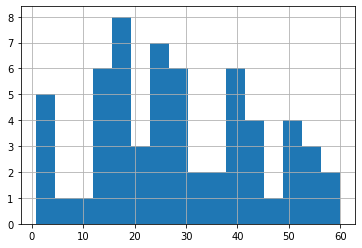

In [172]:
female_C = df[(df['Embarked'] == 'C') & (df['Sex'] == 'female')]
female_C['Age'].hist(bins=16)

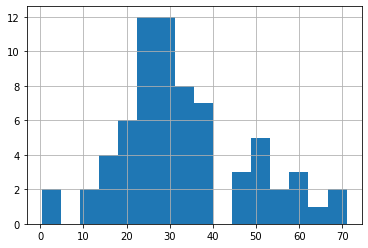

In [173]:
male_C = df[(df['Embarked'] == 'C') & (df['Sex'] == 'male')]
male_C['Age'].hist(bins=16)

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

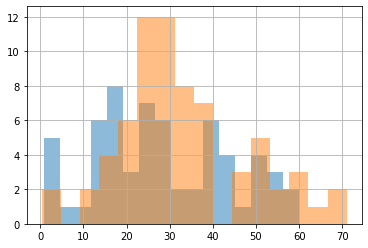

In [174]:
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].hist(bins=16, alpha=0.5)

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

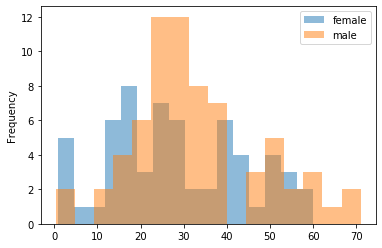

In [175]:
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].plot(bins=16, kind='hist', legend=True, alpha=0.5)

#### What is the average age for female and male for those who have 'Embarked' on section 'C'?

In [176]:
# df[df['Embarked'] == 'C'].groupby('Sex')['Age'].mean()
# df[df['Embarked'] == 'C'].groupby('Sex')['Age'].agg(np.mean)
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].apply(lambda x: np.mean(x))

Sex
female    28.344262
male      32.998841
Name: Age, dtype: float64

#### Which age is the oldest for female and male for those who have embarked on section 'C'?

In [177]:
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].agg(np.max)

Sex
female    60.0
male      71.0
Name: Age, dtype: float64

#### What is the average age for male and female?

In [178]:
df.groupby('Sex')['Age'].mean()
df.groupby('Sex')['Age'].agg(np.mean)

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

#### For different ages, plot the fare they have paid?

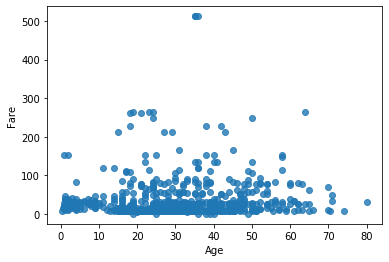

In [179]:
sns.regplot(x='Age', y='Fare', fit_reg=False, data=df)

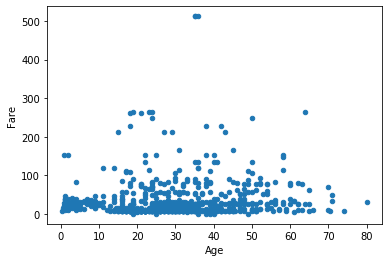

In [180]:
df.plot.scatter(x='Age', y='Fare')

#### Plot how percentage survived for two sex groups based on the passengers class

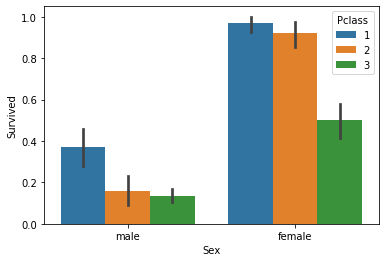

In [181]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df)

#### Plot count ^^^

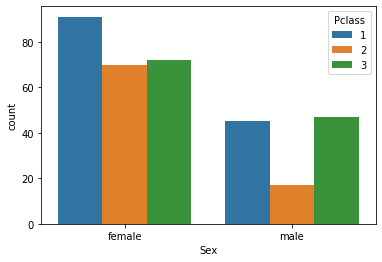

In [182]:
sns.countplot(x='Sex', hue='Pclass', data=df[df['Survived'] == 1])

#### What percentage of females in Pclass 1 survived?

In [183]:
df[(df['Sex'] == 'female') & (df['Pclass'] == 1)]['Survived'].value_counts()

1    91
0     3
Name: Survived, dtype: int64

In [184]:
dict(df[(df['Sex'] == 'female') & (df['Pclass'] == 1)]['Survived'].value_counts())[1] / len( df[(df['Sex'] == 'female') & (df['Pclass'] == 1)]['Survived'])

0.9680851063829787

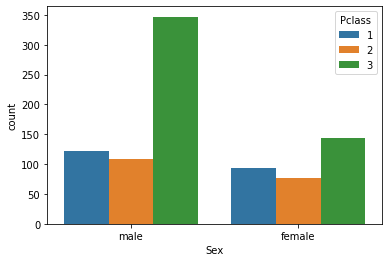

In [185]:
sns.countplot(x='Sex', hue='Pclass', data=df)

# Day 2 - Intro to Pandas

## Dataframe
A Dataframe is a 2D dynamically sized data structure. It has a table structure, where the data is stored in rows and columns.

### Create

One way to create a dataframe is by passing in a dictionary:

In [111]:
import pandas as pd

df = pd.DataFrame(data={
    'name':['john', 'mary', 'peter','jeff','bill', 'lisa'], 
    'age':[23, 78, 22, 19, 45, 33], 
    'state': ['iowa', 'dc', 'california', 'texas', 'washington', 'dc'], 
    'num_children': [2, 2, 0, 1, 2, 1],
    'num_pets' : [0, 4, 0, 5, 0, 0]
    }
)

### Display

#### To display a dataframe: 

In [112]:
df

,name,age,state,num_children,num_pets
0,john,23,iowa,2,0
1,mary,78,dc,2,4
2,peter,22,california,0,0
3,jeff,19,texas,1,5
4,bill,45,washington,2,0
5,lisa,33,dc,1,0


#### To display columns:

In [113]:
df.columns

Index(['name', 'age', 'state', 'num_children', 'num_pets'], dtype='object')

### Select

#### What if we were only interested in the first three columns?

In [114]:
df[['name', 'age', 'state']]

,name,age,state
0,john,23,iowa
1,mary,78,dc
2,peter,22,california
3,jeff,19,texas
4,bill,45,washington
5,lisa,33,dc


#### What if we were only interested in the name and age of the second to fourth rows?

In [115]:
df.loc[2:4, 'name'] # returns a Pandas series

2    peter
3     jeff
4     bill
Name: name, dtype: object

In [116]:
df.loc[2:4, ['name', 'age']] # returns a Pandas dataframe

,name,age
2,peter,22
3,jeff,19
4,bill,45


#### How to select the first and last two rows

In [117]:
df.iloc[:2]

,name,age,state,num_children,num_pets
0,john,23,iowa,2,0
1,mary,78,dc,2,4


In [118]:
df.iloc[-2:]

,name,age,state,num_children,num_pets
4,bill,45,washington,2,0
5,lisa,33,dc,1,0


#### Select rows up to and including the assigned one


In [119]:
df.loc[:2]

,name,age,state,num_children,num_pets
0,john,23,iowa,2,0
1,mary,78,dc,2,4
2,peter,22,california,0,0


#### Note: 
loc selects data by value (provided by the data)   
```df.loc[:2]``` will return rows 0-1  

iloc selects data by index  
```df.iloc[:2]``` will return rows 0-2

#### Select the first column without specifying the name of the column

In [120]:
df.iloc[:,0]

0     john
1     mary
2    peter
3     jeff
4     bill
5     lisa
Name: name, dtype: object

#### Select the second row of dataframe

In [121]:
df.iloc[1]

name            mary
age               78
state             dc
num_children       2
num_pets           4
Name: 1, dtype: object

### Filter

#### Display all people who age is greater than 30

In [122]:
df[df['age'] > 30] # 1
df[df.age > 30] # 2

,name,age,state,num_children,num_pets
1,mary,78,dc,2,4
4,bill,45,washington,2,0
5,lisa,33,dc,1,0


#### Display all people who have more pets than children

In [123]:
df[df.num_pets > df.num_children]

,name,age,state,num_children,num_pets
1,mary,78,dc,2,4
3,jeff,19,texas,1,5


#### Display all people who are older than 40 AND have pets

In [124]:
df[(df.age > 40) & (df.num_pets > 0)] 

# must separate conditions with parenthesis, below will not work
# df[df.age > 40 & df.num_pets > 0] 

,name,age,state,num_children,num_pets
1,mary,78,dc,2,4


#### Return the number of people who are older than 40 and have pets

In [125]:
len(df[(df.age > 40) & (df.num_pets > 0)])

1

#### Display all people who are older than 40 OR have pets

In [126]:
df[(df.age > 40) | (df.num_pets > 0)] 

,name,age,state,num_children,num_pets
1,mary,78,dc,2,4
3,jeff,19,texas,1,5
4,bill,45,washington,2,0


#### Display all people who do have pets w/o using the greater sign

In [127]:
df[df.num_pets != 0]

,name,age,state,num_children,num_pets
1,mary,78,dc,2,4
3,jeff,19,texas,1,5


#### What if you don't want the ```age``` and ```num_children``` columns?

In [128]:
df.drop(['age', 'num_children'], axis=1)

,name,state,num_pets
0,john,iowa,0
1,mary,dc,4
2,peter,california,0
3,jeff,texas,5
4,bill,washington,0
5,lisa,dc,0


axis=1 is column-wise  
axis=0 is row-wise

Calling the `drop` function makes a *copy* of the dataframe but does not modify the actual dataframe itself:

In [129]:
df

,name,age,state,num_children,num_pets
0,john,23,iowa,2,0
1,mary,78,dc,2,4
2,peter,22,california,0,0
3,jeff,19,texas,1,5
4,bill,45,washington,2,0
5,lisa,33,dc,1,0


To apply changes, just reassign the dataframe to the drop function  
```df = df.drop(['age', 'num_children'], axis=1)```

### Statistics

#### To display statistics 

In [130]:
df.describe()

,age,num_children,num_pets
count,6.000000,6.000000,6.000000
mean,36.666667,1.333333,1.500000
std,22.384518,0.816497,2.345208
min,19.000000,0.000000,0.000000
25%,22.250000,1.000000,0.000000
50%,28.000000,1.500000,0.000000
75%,42.000000,2.000000,3.000000
max,78.000000,2.000000,5.000000


#### What is the average for age, num_pets, and num_children?

Without numpy:

In [131]:
df[['age', 'num_pets', 'num_children']].mean()

age             36.666667
num_pets         1.500000
num_children     1.333333
dtype: float64

With aggregate function applied to every column (numpy):

In [132]:
import numpy as np
df[['age', 'num_pets', 'num_children']].apply(lambda col: np.mean(col), axis=0)

age             36.666667
num_pets         1.500000
num_children     1.333333
dtype: float64

#### Get the total sum of all ages

In [133]:
df['age'].sum()

220

### Types

In [134]:
df_age = df[['age']]
df_age

,age
0,23
1,78
2,22
3,19
4,45
5,33


In [135]:
series_age = df['age']
series_age

0    23
1    78
2    22
3    19
4    45
5    33
Name: age, dtype: int64

In [136]:
print(type(df_age))
print(type(series_age))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### Apply
Execute a function in every row of the dataframe

#### Double the age of each row

In [137]:
df_age.apply(lambda x: x*2)

,age
0,46
1,156
2,44
3,38
4,90
5,66


#### Create a function and apply it to the same dataframe

In [138]:
df_age_col = df_age.apply(lambda x: x*2)
df['age'] = df_age_col
df

,name,age,state,num_children,num_pets
0,john,46,iowa,2,0
1,mary,156,dc,2,4
2,peter,44,california,0,0
3,jeff,38,texas,1,5
4,bill,90,washington,2,0
5,lisa,66,dc,1,0


#### Create a new column

In [139]:
df['new_column'] = df['num_children'].apply(lambda x: x + 5)
df

,name,age,state,num_children,num_pets,new_column
0,john,46,iowa,2,0,7
1,mary,156,dc,2,4,7
2,peter,44,california,0,0,5
3,jeff,38,texas,1,5,6
4,bill,90,washington,2,0,7
5,lisa,66,dc,1,0,6


#### Select all rows who name starts with the letter 'j'

In [140]:
df[df.apply(lambda row: row['name'].startswith('j'), axis=1)]

,name,age,state,num_children,num_pets,new_column
0,john,46,iowa,2,0,7
3,jeff,38,texas,1,5,6


### Titanic dataset exercise

#### Dataset information
| Variable | Definition                     | Key                                            |
|----------|--------------------------------|------------------------------------------------|
| survival | Survival                       | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                   | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                            |                                                |
| Age      | Age in years                   |                                                |
| sibsp    | # of siblings / spouses aboard |                                                |
| parch    | # of parents / children aboard |                                                |
| ticket   | Ticket number                  |                                                |
| fare     | Passenger fare                 |                                                |
| cabin    | Cabin number                   |                                                |
| embarked | Port of Embarkation            | C = Cherbourg, Q = Queenstown, S = Southampton |

#### To load csv as dataframe

In [141]:
df = pd.read_csv("./Datasets/titanic.csv")
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### What is the average age for females in the Titanic?

In [142]:
df[df.Sex == 'female'].Age.mean()

27.915708812260537

#### To make a column into a list

In [143]:
ls_gender = df['Sex'].values
ls_age = df['Age'].values

#### What would you do if you didn't have access to the dataframe anymore and are just given the gender and age column? Write a python function that returns the average age for female passengers.

In [144]:
# def female_average_age_tasfia(ls_gender, ls_age):
#     avg = 0
#     count = 0
#     for index, value in enumerate(ls_gender):
#         if value == 'female':
#             if np.isnan(ls_age[index]) == False:
#                 avg += ls_age[index]
#                 count += 1
#     return avg / count

def female_average_age_milad(ls_gender, ls_age):
    avg = 0
    count = 0

    for gen, age in zip(ls_gender, ls_age):
        if gen == 'female' and np.isnan(age) == False:
            avg += age
            count += 1
    return avg / count

# print(female_average_age_tasfia(ls_gender, ls_age))
print(female_average_age_milad(ls_gender, ls_age))

27.915708812260537


## Currency dataset exercise

In [145]:
from collections import OrderedDict
from pandas import DataFrame
import pandas as pd
import numpy as np

table = OrderedDict((
    ("Item", ['Item0', 'Item0', 'Item1', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  ['1$', '2$', '3$', '4$']),
    ('EU',   ['1€', '2€', '3€', '4€'])
))

In [146]:
curr = DataFrame(table)
curr

,Item,CType,USD,EU
0,Item0,Gold,1$,1€
1,Item0,Bronze,2$,2€
2,Item1,Gold,3$,3€
3,Item1,Silver,4$,4€


### Pivot
Organize data... [COMPLETE THIS]

In [147]:
pivot_curr = curr.pivot(index='Item', columns='CType', values='USD')
pivot_curr

CType,Bronze,Gold,Silver
Item,,,
Item0,2$,1$,NaN
Item1,NaN,3$,4$


## Summary

## Homework
https://www.makeschool.com/academy/track/app-store-dataset-tutorial

# Day 1 - Intro to DS

### Exploratory Data Analysis (EDA)
REVIEW NOTES
https://en.wikipedia.org/wiki/Exploratory_data_analysis

### Ex: Data careers in London

<img src='https://raw.githubusercontent.com/Make-School-Courses/DS-1.1-Data-Analysis/614dcf0a700b63bc7b5609cb2406e412c6bdea31/Notebooks/Images/DE_DA_DS.png' width='500px'/>

Which career has the better salary?
- The _chance_ that the **data engineer** earns less than 60K a year is 25%.
- The _chance_ that the **data scientist** earns less than 60K a year is 63%.
- The _chance_ that the **data analyst** earns less than 60K a year is 92%.


Data engineers earn the most compared to scientists and analysts.

### Different ways to gather data
- web scraping
- surveys
- APIs
- SQL queries
- CSV files

### Ex: How many female passengers survived the Titanic?

#### No pandas

In [107]:
import csv

titanic_data = "./Datasets/titanic.csv"
with open(titanic_data) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    female_survived = 0
    for row in csv_reader:
        if (row[1] == '1') & (row[4] == 'female'):
            female_survived += 1

print(female_survived)

233


#### Pandas

In [108]:
import pandas as pd 

titantic_data = "./Datasets/titanic.csv"
with open(titantic_data) as csv_file:
    data = pd.read_csv(csv_file) 
    
    female_survived = len(data[(data['Sex'] == 'female') & (data['Survived'] == 1)])

print(female_survived, '-- # of females that survived')

233 -- # of females that survived


In [109]:
male_survived = len(data[(data['Sex'] == 'male') & (data['Survived'] == 1)])
female_died = len(data[(data['Sex'] == 'female') & (data['Survived'] == 0)])
male_died = len(data[(data['Sex'] == 'male') & (data['Survived'] == 0)])

print(male_survived, '-- # of males that survived')
print(female_died, '-- # of females that died')
print(male_died, '-- # of males that died')

109 -- # of males that survived
81 -- # of females that died
468 -- # of males that died


|        | survived | died | total |
|:------:|:--------:|:----:|-------|
| female |    233   |  81  |  314  |
|  male  |    109   |  468 |  577  |
| total  |    342   |  549 |  891  |

In [110]:
passengers = [
    [female_survived, female_died], 
    [male_survived, male_died]
]

# for female passengers, what percentage survived and died?
# gender / total # of gender
by_gender_percentage = []

# for survived passengers, what percentage were male/female?
# gender / total # survived or died

|        | survived | died |
|:------:|:--------:|:----:|
| female |    __%   |  __%  |
|  male  |    __%   |  __% |

#### What questions can we answer from the Titanic dataset?
- Which cabin was mostly to survive?
- Average age of male passenger?
- How many people less than 18 died?
- Average fare paid of survivors vs. died
- Of women older than 18, what percentage were married?